# Huffman Coding

This algorithm is very used in texts and based on the frequency of letters in words, for example it will be easier to find the letter A than the letter Z, so attempted to encode the letters more frequently, such as A, with shorter binary codes than those used for Z, in this way the most frequent letters in a text are replaced by shorter bit codes.

Let's see a simple example:

'$CIAO\space MAMMA$'

In the normal way each letter is represented by 8 bits encoded respecting the **ASCII** code, so:

$A = 01000001$

$C = 01000011$

$I = 01001001$

$O = 01001111$

$M = 01001101$

$'\space' = 00100000$


Our file will be composed of 80 bits, that is 10 letters * 8 bits...

With Huffman Coding we want construct a tree in which the most frequent letters are positioned closer to the root than those with less frequency.
So first count the frequency of each letter in our string and finds the lower 2 (in our example C and I), these will be used to construct the new node at the base of the tree.
These letters will be represented from now on as a single letter and with a frequency that will be the sum of their frequencies.
Repeat this mechanism until our tree is complete, now a bit must be associated with each node.
It is possible to associate the 0 to all the nodes on the left and 1 to all those on the right (or the opposite in an equivalent way)

So we find that:

$A= 10$

$C= 000$

$I= 001$

$O= 010$

$M= 11$

$'\space'= 001$

If we want to write our $\Rightarrow$ '$CIAO\space MAMMA$' with the new codes we will obtain the following sequence of bits:

**Hauffman bit** $=000001100100111110111110$

Only $24$ **bits out of the 80 used previously** with the **ASCII** code.

### Now let's see what happens with a larger file 
$n$ $\rightarrow$ $from\space input$

In [4]:
import math
import matplotlib.pyplot as plt

In [33]:
n = int(input("enter the number of char: "))

In [34]:
entropy_list=[] 
space=[]
L_list=[] #sum of pi * li (number of bit for each char)


def open_text(url):
    text=''
    with open(url,'r') as file:
        text=file.read()
    return text[0:n]

'''create simple class to generate children and parents of tree'''
class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return "%s_%s" % (self.left, self.right)


'''create hauffman tree thanks with a dictionary'''
def huffmanCodeTree(node, left=True, binString=""):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffmanCodeTree(l, True, binString + "0"))
    d.update(huffmanCodeTree(r, False, binString + "1"))
    return d


string=open_text('/Users/alfonsodamelio/Desktop/DATA SCIENCE/2°SEMESTRE/Data monitoring (MATLAB)/HW2/text_Huffman.txt')

'''for each char we compute frequency '''
freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1
'''compute probability for each char thanks to frequency above computed'''
prob=[i/n for i in freq.values()]
char=[i for i in freq.keys()]

'''create dictionary with this structure ----> {char:probability}'''
freq=dict(zip(char,prob))

'''computed entropy for each char'''
entropy=-(sum([k * math.log2(k) for k in freq.values()]))

''' in freq we have all the couple---> (char,probability) order by probability in a descending order'''
freq = sorted(freq.items(), key=lambda x: (x[1]), reverse=True)

list_nodes = freq

#let's execute Huffman algorithm
'''
1- order list in a descending order
2- take the two char with lower probability and create two children in the tree
3- join them in a single char with probability equal to the sum of their probability and create parent in the tree
4- remove from list the two elements take in step 2 and add the parent create in step 3
5- do this until length of list is greater than 1
'''
while len(list_nodes) > 1:
    
    #take the last two objects of the list_nodes
    char1, prob1 = list_nodes[-1]
    char2, prob2 = list_nodes[-2]
    
    #remove these two objects from list_nodes
    list_nodes = list_nodes[:-2]
    
    #with the class object we create parents and children of the tree.
    node = NodeTree(char1, char2)
    #add parents to list_nodes
    list_nodes.append((node, prob1 + prob2))
    # sort again the list
    list_nodes = sorted(list_nodes, key=lambda x: x[1], reverse=True)

#Apply Huffman Tree on list_nodes
huffmanCode = huffmanCodeTree(list_nodes[0][0])


print('This is the number of char that we took from input from the text: '+str(n)+' out of 731')
print('\nThis is the text: \n \n'+string)
#let's print Huffman code...
print('\n \nThis is the Hauffman code result: \n ')
print (" Char | Prob  | Huffman code ")
print ("-----------------------------")
hauffman_bit=0
prob_times_lengthchar=[] #sum of pi * li(length of bit of each char)
for char, frequency in freq:
    print (" %-4r | %f | %12s" % (char, frequency, huffmanCode[char]))
    hauffman_bit+=len(huffmanCode[char])*frequency*n
    prob_times_lengthchar.append(len(huffmanCode[char])*frequency)


L=sum(prob_times_lengthchar)
L_list.append(L)
entropy_list.append(entropy)

hash_bit=n*8
save_space=(hauffman_bit/hash_bit)*100

print('\nHash bit: '+str(hash_bit))
print('Huffman bit: '+str(hauffman_bit))
print('Percentage of space recovered with Huffman: ',str(round(save_space))+'%')



This is the number of char that we took from input from the text: 90 out of 731

This is the text: 
 
Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler

 
This is the Hauffman code result: 
 
 Char | Prob  | Huffman code 
-----------------------------
 ' '  | 0.166667 |          110
 'o'  | 0.111111 |          011
 'e'  | 0.088889 |          001
 'r'  | 0.077778 |         1110
 'd'  | 0.077778 |         1011
 'n'  | 0.055556 |         1000
 'l'  | 0.055556 |         0101
 'a'  | 0.044444 |         0100
 't'  | 0.044444 |        11111
 'w'  | 0.033333 |        10100
 'v'  | 0.033333 |        10011
 's'  | 0.022222 |       101011
 'i'  | 0.022222 |       101010
 'y'  | 0.022222 |        00001
 '\n' | 0.022222 |        00000
 'A'  | 0.022222 |        00011
 'b'  | 0.022222 |        00010
 'T'  | 0.011111 |       100100
 'g'  | 0.011111 |      1001011
 ','  | 0.011111 |      1001010
 'I'  | 0.011111 |      1111001
 'c'  | 0.011111 |      1111000
 'u

# Let's try for a list of number of char

In [6]:
input_number=list(map(int, input("enter a list of number of char: ").split())) #731 max length
# 10 50 200 731

In [14]:
entropy_list=[]
space=[]
L_list=[]

for n in input_number:
    
    string=open_text('/Users/alfonsodamelio/Desktop/DATA SCIENCE/2°SEMESTRE/Data monitoring (MATLAB)/HW2/text_Huffman.txt')
    
    freq = {}
    for c in string:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    
    prob=[i/n for i in freq.values()]
    char=[i for i in freq.keys()]   
    freq=dict(zip(char,prob))
    
    #entropy formula -sum(pi*log2(pi))
    entropy=-(sum([k * math.log2(k) for k in freq.values()]))
    
    #Sort the frequency table based on occurrence this will also convert the
    #dict to a list of tuples
    freq = sorted(freq.items(), key=lambda x: (x[1]), reverse=True)

    
    list_nodes = freq
    
    while len(list_nodes) > 1:
        #take the last two objects of the list_nodes
        char1, prob1 = list_nodes[-1]
        char2, prob2 = list_nodes[-2]

        #remove these two objects from list_nodes
        list_nodes = list_nodes[:-2]

        #with the class object we create parents and children of the tree.
        node = NodeTree(char1, char2)
        #add parents to list_nodes
        list_nodes.append((node, prob1 + prob2))
        # sort again the list
        list_nodes = sorted(list_nodes, key=lambda x: x[1], reverse=True)
    
    #Apply Huffman Tree on list_nodes
    huffmanCode = huffmanCodeTree(list_nodes[0][0])
    
    prob_times_lengthchar=[] 
    hauffman_bit=0
    for char, frequency in freq:
        hauffman_bit+=len(huffmanCode[char])*frequency*n
        prob_times_lengthchar.append(len(huffmanCode[char])*frequency)
    
    L=sum(prob_times_lengthchar) #sum of pi * li(length of bit of each char)
    L_list.append(L)
    hash_bit=n*8
    save_space=100-(hauffman_bit/hash_bit)*100
    space.append(100-save_space)
    
    entropy_list.append(entropy)
    
    values=[]
    for i in range(len(entropy_list)):
        value=L_list[i]/entropy_list[i]
        # L(n) / entropy
        values.append(value)

In the plot below we show  how as the number of char increases, the saving percentage over the original message with **Hauffman** increases, we compute the following calculation:

$save_{space}=\bigg(100-\frac{Hauffman_{bit}}{Hash_{bit}}\bigg)\cdot 100$

So it means that:

+ if we choose 10 like number of char the saving percentage over the original message will be of $69\%$
+ if we choose 100 like number of char the the saving percentage over the original message will be of $85\%$

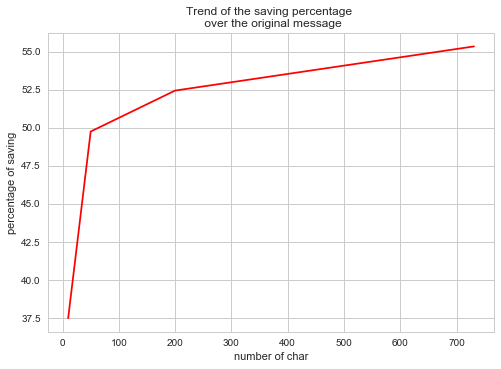

In [15]:
import seaborn as sns
sns.set_style('whitegrid')
plt.plot(input_number,space,color='red')
plt.title('Trend of the saving percentage \n over the original message')
plt.xlabel('number of char')
plt.ylabel('percentage of saving')
plt.show()

At this point we are able to display another plot which represents the relationship between:
+  $\tilde{L}_n$
+  $H(S_n)$

Where:
1. $\tilde{L}_n=\sum_{i=1}^n p_i \cdot l_i$ 
    
    + $i=char_i$
    + $p=\frac{frequence(char_i)}{\text{n° of tot.char}}$
    + $l_i$ $\rightarrow$ length in **Hauffman** bit of $char_i$
 
2. $H(S_n)=-\sum_{i=1}^n p_i \cdot log_2(p_i)$ 

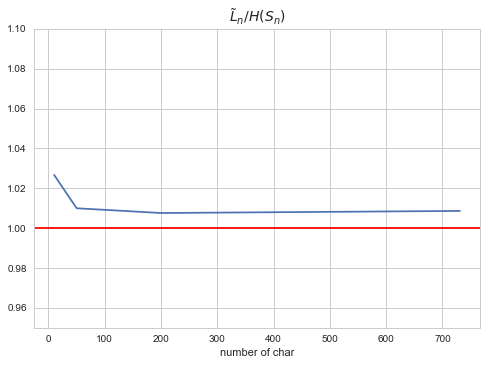

In [19]:
sns.set_style('whitegrid')
plt.plot(input_number,values)
plt.ylim(0.95,1.1)
plt.title(r'$\tilde L_n /H(S_n)$',fontsize=14)
plt.xlabel('number of char')
plt.axhline(1, color='r')
plt.show()